In [1]:
import SIMSIToolBox
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from copy import deepcopy
import umap
from sklearn.cluster import KMeans
import pickle as pkl
import molmass
import SIMSIToolBox.recalibration

In [2]:
datadir = "X:/MSI_Shared_Data/13CImagingManuscript/raw_data/non-perfused/maldi/12C/"
subdirs = ["12x","14x"]

In [3]:
peaklist = pd.read_csv(datadir + "../metabolites_with_signal_to_extract_annotated.csv")
peaklist

,ion,formula,adduct,mz,name,labeling trend,pool size trend in tumor,14x,12x,10x,8x,100um,50um,comment,moleculeNames,moleculeIds,for_paper
0,C10H14N5O7P-H-,C10H14N5O7P,M-H,346.055729,AMP,1,1,0,1,0,0,1,1,NaN,"Adenosine monophosphate, 2'-Deoxyguanosine 5'-...","HMDB0000045, HMDB0001044, HMDB0003540, HMDB001...",1
1,C10H17N3O6S-H-,C10H17N3O6S,M-H,306.076451,Glutathione,1,1,1,1,0,0,1,1,NaN,Glutathione,HMDB0000125,0
2,C10H9N-H-,C10H9N,M-H,142.066144,6-Methylquinoline,0,0,1,1,0,0,0,1,NaN,"6-Methylquinoline, 2-Aminonaphthalene, Quinaldine","HMDB0033115, HMDB0041802, HMDB0042004",0
3,C12H14N2-H-,C12H14N2,M-H,185.108343,Detomidine,0,0,0,1,0,0,1,1,NaN,"1,2,3,4-Tetrahydro-2-methyl-b-carboline, 1-Phe...","HMDB0029836, HMDB0037144, HMDB0041872",0
4,C16H32O2-H-,C16H32O2,M-H,255.232875,Palmitate,1,1,0,1,0,0,1,1,some interference at 14x 50 um,"Butyl dodecanoate, Dodecyl butyrate, Hexyl dec...","HMDB0032065, HMDB0032249, HMDB0032324, HMDB000...",1
5,C18H36O2-H-,C18H36O2,M-H,283.264176,Stearate,1,1,0,1,0,0,0,1,NaN,"Stearic acid, Ethyl hexadecanoate, 16-Methylhe...","HMDB0000827, HMDB0029811, HMDB0031066, HMDB006...",1
6,C20H32O2-H-,C20H32O2,M-H,303.232875,Arachidonate,1,1,0,1,0,0,1,1,NaN,"ent-17-Hydroxy-16beta-kauran-19-al, Arachidoni...","HMDB0036721, HMDB0001043, HMDB0002177, HMDB000...",0
7,C2H7NO3S-H-,C2H7NO3S,M-H,124.007309,Taurine,0,0,1,1,1,0,1,1,NaN,Taurine,HMDB0000251,0
8,C3H7O7P-H-,C3H7O7P,M-H,184.985584,2PG,0,0,1,0,0,0,1,0,NaN,"2-Phosphoglyceric acid, 3-Phosphoglyceric acid...","HMDB0000362, HMDB0000807, HMDB0003391, HMDB006...",0
9,C4H12NO4P-H-,C4H12NO4P,M-H,168.043039,Phosphodimethylethanolamine,0,0,1,1,1,1,1,1,NaN,Phosphodimethylethanolamine,HMDB0060244,0


In [4]:
ppmThresh = 5
num_cores = 20
intensityCutoff = 100
convSquare = 3 #size of filter (1=1x1,3=3x3,5=5x5)
colormap = LinearSegmentedColormap.from_list("test",colors=["black", "navy","blue","cyan","yellow","orange","orangered","red","mistyrose","white"],N=256)
dm_method = "PCA" #method for dimensionality reduction ("PCA" or "TSNE") PCA has worked better for me
seg_method = "K_means" #thresholding method ("TIC_auto", "K_means", "TIC_manual")
num_components = 2 #number of compoents to use with PCA or TSNE
filtMethod = "GB" #filtering method (GB = gaussian blur, MA = moving average)

c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\pyimzml\ontology\ontology.py:94: UserWarning: Accession IMS:1000046 found with incorrect name "pixel size x". Updating name to "pixel size (x)".
  % (accession, raw_name, name)


300 peaks found
16 hits found
16 peaks in roi found
300 peaks found
16 hits found
16 peaks in roi found
300 peaks found
17 hits found
17 peaks in roi found
300 peaks found
16 hits found
16 peaks in roi found
300 peaks found
16 hits found
16 peaks in roi found


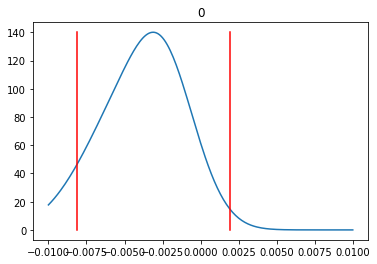

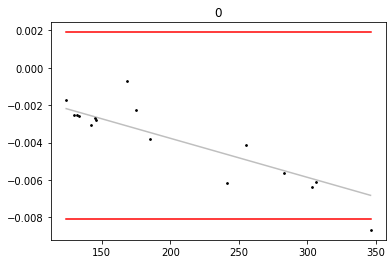

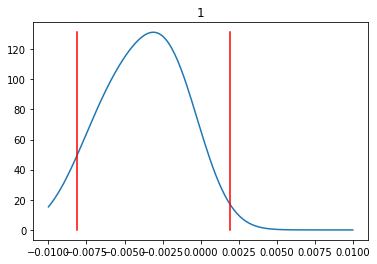

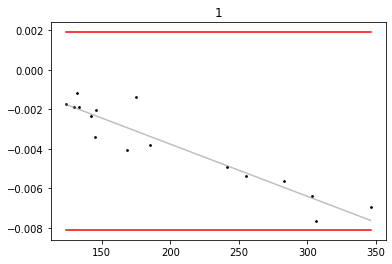

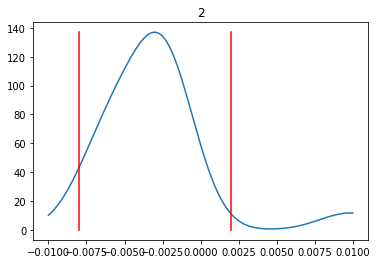

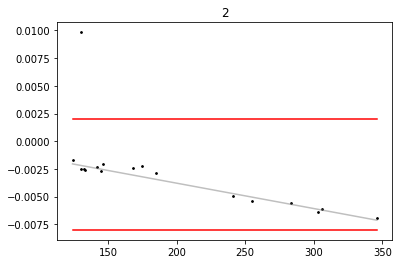

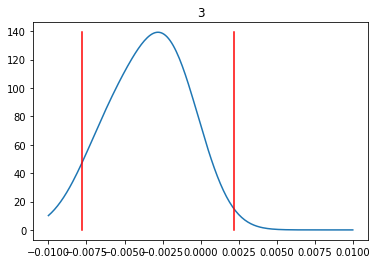

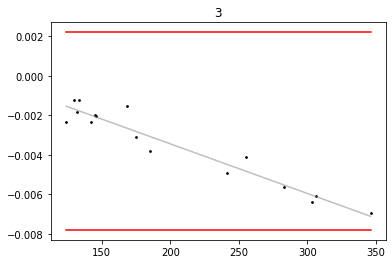

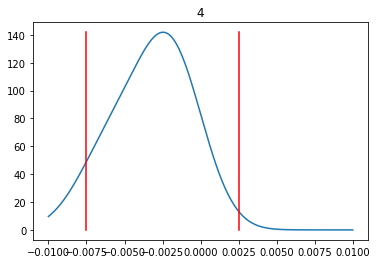

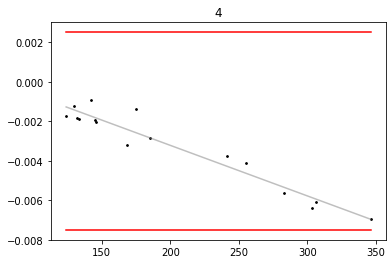

In [5]:
if __name__ == "__main__":
    tolerance = 0.01
    step = 0.002
    dalim = 0.005
    file = [x for x in os.listdir(datadir+subdirs[0]) if ".imzML" in x and "recal" not in x][0]
    filt = peaklist[peaklist[subdirs[0]] > 0.5]
    mzsCorr = list(filt["mz"].values)
    mzsCorr.sort()
    SIMSIToolBox.recalibration.visualizeParameters(datadir + subdirs[0] + "/" + file,5,tolerance,mzsCorr,step,dalim)



In [7]:
if __name__ == "__main__":
    for subdir in subdirs:
        files = [x for x in os.listdir(datadir + subdir) if ".imzML" in x and "recal" not in x]
        filt = peaklist[peaklist[subdir] > 0.5]
        mzsCorr = list(filt["mz"].values)
        mzsCorr.sort()
        for file in files:
            if file.replace(".imzML","_recal.imzML") not in os.listdir(datadir + subdir):
                print(subdir,file)
                SIMSIToolBox.recalibration.write_corrected_msi(datadir + subdir + "/" + file,datadir + subdir + "/" + file.replace(".imzML","_recal.imzML"),tolerance,mzsCorr,step,dalim,numCores=num_cores)



In [6]:
mzs = []
keys = []
for index,row in peaklist.iterrows():
    _,_,nC = SIMSIToolBox.getMzsOfIsotopologues(row["formula"],"C")
    for x in range(nC+1):
        mzs.append(row["mz"] + 1.00336 * x)
        keys.append((index,x))
print(len(mzs))

172


In [7]:
inds = []
for index,row in peaklist.iterrows():
    tmp = [x for x in range(len(keys)) if keys[x][0] == index]
    tmp.sort(key=lambda x: keys[x][1])
    inds.append(tmp)
peaklist["inds"] = inds
peaklist

,ion,formula,adduct,mz,name,labeling trend,pool size trend in tumor,14x,12x,10x,8x,100um,50um,comment,moleculeNames,moleculeIds,for_paper,inds
0,C10H14N5O7P-H-,C10H14N5O7P,M-H,346.055729,AMP,1,1,0,1,0,0,1,1,NaN,"Adenosine monophosphate, 2'-Deoxyguanosine 5'-...","HMDB0000045, HMDB0001044, HMDB0003540, HMDB001...",1,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]"
1,C10H17N3O6S-H-,C10H17N3O6S,M-H,306.076451,Glutathione,1,1,1,1,0,0,1,1,NaN,Glutathione,HMDB0000125,0,"[11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]"
2,C10H9N-H-,C10H9N,M-H,142.066144,6-Methylquinoline,0,0,1,1,0,0,0,1,NaN,"6-Methylquinoline, 2-Aminonaphthalene, Quinaldine","HMDB0033115, HMDB0041802, HMDB0042004",0,"[22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]"
3,C12H14N2-H-,C12H14N2,M-H,185.108343,Detomidine,0,0,0,1,0,0,1,1,NaN,"1,2,3,4-Tetrahydro-2-methyl-b-carboline, 1-Phe...","HMDB0029836, HMDB0037144, HMDB0041872",0,"[33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 4..."
4,C16H32O2-H-,C16H32O2,M-H,255.232875,Palmitate,1,1,0,1,0,0,1,1,some interference at 14x 50 um,"Butyl dodecanoate, Dodecyl butyrate, Hexyl dec...","HMDB0032065, HMDB0032249, HMDB0032324, HMDB000...",1,"[46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 5..."
5,C18H36O2-H-,C18H36O2,M-H,283.264176,Stearate,1,1,0,1,0,0,0,1,NaN,"Stearic acid, Ethyl hexadecanoate, 16-Methylhe...","HMDB0000827, HMDB0029811, HMDB0031066, HMDB006...",1,"[63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 7..."
6,C20H32O2-H-,C20H32O2,M-H,303.232875,Arachidonate,1,1,0,1,0,0,1,1,NaN,"ent-17-Hydroxy-16beta-kauran-19-al, Arachidoni...","HMDB0036721, HMDB0001043, HMDB0002177, HMDB000...",0,"[82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 9..."
7,C2H7NO3S-H-,C2H7NO3S,M-H,124.007309,Taurine,0,0,1,1,1,0,1,1,NaN,Taurine,HMDB0000251,0,"[103, 104, 105]"
8,C3H7O7P-H-,C3H7O7P,M-H,184.985584,2PG,0,0,1,0,0,0,1,0,NaN,"2-Phosphoglyceric acid, 3-Phosphoglyceric acid...","HMDB0000362, HMDB0000807, HMDB0003391, HMDB006...",0,"[106, 107, 108, 109]"
9,C4H12NO4P-H-,C4H12NO4P,M-H,168.043039,Phosphodimethylethanolamine,0,0,1,1,1,1,1,1,NaN,Phosphodimethylethanolamine,HMDB0060244,0,"[110, 111, 112, 113, 114]"


extracting intensities |██████████████████████████████████████████████████| 100.0% 
Smoothing data |██████████████████████████████████████████████████| 100.0% 
correcting natural abundance |██████████████████████████████████████████████████| 100.0% 
extracting intensities |██████████████████████████████████████████████████| 100.0% 
Smoothing data |██████████████████████████████████████████████████| 100.0% 
correcting natural abundance |██████████████████████████████████████████████████| 100.0% 


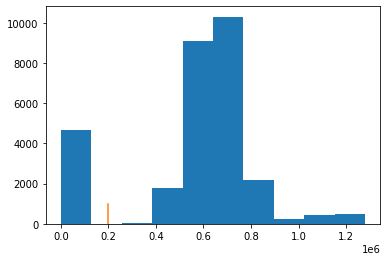

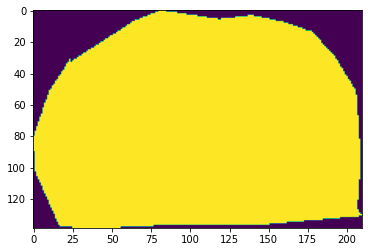

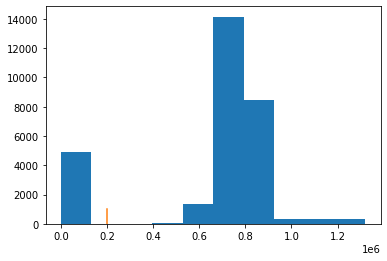

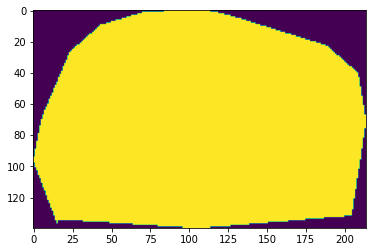

In [8]:
if __name__ == "__main__":
    msis = {}
    for subdir in subdirs:
        files = [x for x in os.listdir(datadir + subdir) if "_recal.imzML" in x]
        msis[subdir] = {}
        for file in files:
            msi = SIMSIToolBox.MSIData(mzs,ppm=ppmThresh,numCores = num_cores,intensityCutoff=intensityCutoff)
            msi.readimzML(datadir + subdir + "/" + file)
            #msi.segmentImage(method=seg_method, num_latent=num_components, dm_method=dm_method,fill_holes = True)
            msi.segmentImage(method="TIC_manual",threshold =0.2e6)
            plt.figure()
            plt.imshow(msi.imageBoundary)
            msi.smoothData(filtMethod,convSquare)
            msi.correctNaturalAbundance(peaklist["formula"].values,peaklist["inds"].values)
            msis[subdir][file] = msi



c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in true_divide


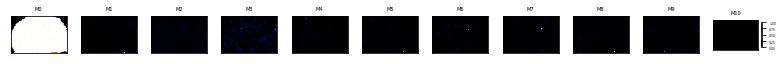

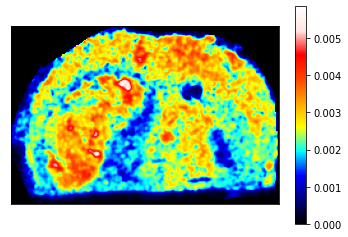

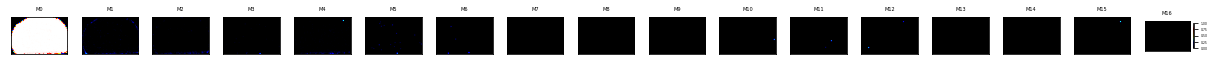

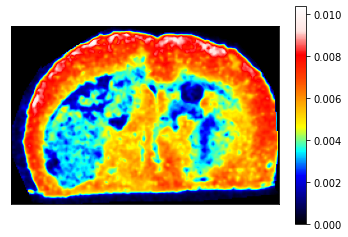

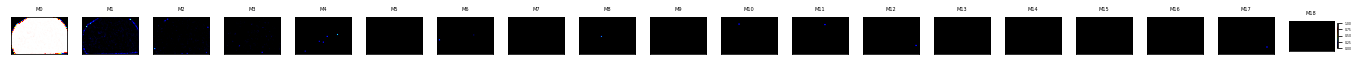

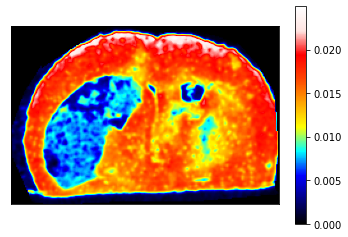

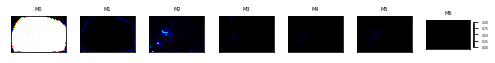

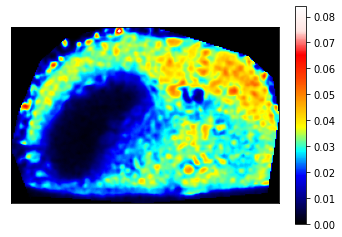

In [9]:
for subdir in subdirs:
    for fn in msis[subdir]:
        try: os.mkdir(datadir + subdir + "/" + fn.replace(".imzML",""))
        except: pass

maxLabs = {"C16H32O2":[1.0 for x in range(2)] + [0.1 for x in range(15)],
           "C18H36O2":[1.0 for x in range(2)] + [0.1 for x in range(17)],
           "C6H9NO5":[1.0 for x in range(7)],
           "C10H14N5O7P":[1.0 for x in range(6)] + [0.25 for x in range(5)]}
badInds = {"C16H32O2":[1,2],
       "C18H36O2":[1,3],
       "C6H9NO5":[],
       "C10H14N5O7P":[]}
    
for index,row2 in peaklist.iterrows():
    inds = row2["inds"]
    if row2["for_paper"] > 0.5:
        for subdir in subdirs:
            if row2[subdir] > 0.5:
                for fn in msis[subdir]:
                    fig, axes = plt.subplots(1,len(inds),figsize=(len(inds),1))
                    tmp = msis[subdir][fn].data_tensor[inds]
                    isoTensor = SIMSIToolBox.normalizeTensor(tmp)
                    col = 0
                    for img in isoTensor:
                        tmp = axes[col].imshow(img,cmap=colormap)
                        axes[col].set_xticks([])
                        axes[col].set_yticks([])
                        axes[col].set_title("M"+str(col),fontsize=5)
                        if col == len(isoTensor) - 1:
                            cbar = plt.colorbar(tmp, ax=axes[col],shrink=0.5)
                            tmp.set_clim(0.0,1.0)
                            cbar.ax.tick_params(labelsize=3)
                        col += 1

                    plt.tight_layout()
                    plt.savefig(datadir + subdir + "/" + fn.replace(".imzML","/") + row2["formula"] + "_iso_all.png")

                    tmp = msis[subdir][fn].data_tensor[[inds[x] for x in range(len(inds)) if x not in badInds[row2["formula"]]]]
                    isoTensor = SIMSIToolBox.normalizeTensor(tmp)
                    maxLim = 1.0
                    counter = 0
                    for img in isoTensor:
                        norm = plt.Normalize(vmin=0, vmax=maxLabs[row2["formula"]][counter])
                        norm = colormap(norm(img))
                        for row in range(norm.shape[0]):
                            for col in range(norm.shape[1]):
                                if msis[subdir][fn].imageBoundary[row,col] < .5:
                                    norm[row,col,3] = 0
                        plt.imsave(datadir + subdir + "/" +  fn.replace(".imzML","/") + row2["formula"] + "_M" + str(counter) +".png",norm)#,cmap=colormap)
                        counter += 1

                    plt.figure()
                    SIMSIToolBox.showImage(img,cmap = colormap)
                    plt.clim(0,maxLim)
                    plt.savefig(datadir + subdir + "/" + fn.replace(".imzML","/") + row2["formula"] + "_M" + str(counter-1) +"_withColorBar.png")
                    plt.close()


                    tmp = msis[subdir][fn].data_tensor[inds]    
                    poolSize = np.sum(tmp,axis=0)
                    poolSize = poolSize / msis[subdir][fn].tic_image
                    poolSize[msis[subdir][fn].imageBoundary < 0.5] = 0.0
                    plt.figure()

                    SIMSIToolBox.showImage(poolSize,cmap = colormap)
                    maxLim = np.max(poolSize)
                    plt.clim(0,maxLim)
                    norm = plt.Normalize(vmin=0, vmax=maxLim)
                    norm = colormap(norm(poolSize))
                    for row in range(norm.shape[0]):
                        for col in range(norm.shape[1]):
                            if msis[subdir][fn].imageBoundary[row,col] < .5:
                                norm[row,col,3] = 0
                    plt.imsave(datadir + subdir + "/" + fn.replace(".imzML","/") + row2["formula"] + "_pool.png",norm)#,cmap=colormap)
                    plt.savefig(datadir + subdir + "/" + fn.replace(".imzML","/") + row2["formula"] + "_pool_with_colorbar.png")


            
    
    
    

In [10]:
pkl.dump([peaklist,msis],open(datadir + "processed_data.pkl","wb"))

In [ ]:
[peaklist,msis] = pkl.load(open(datadir + "processed_data.pkl","rb"))